# Machine Learning Anxiety Level Clasification Dataset Mental Health Digital Behavior by Wiga

## Penjelasan

### Dataset Overview
Kumpulan data ini berisi data simulasi tentang bagaimana perilaku digital berkorelasi dengan indikator kesehatan mental, khususnya berfokus pada faktor-faktor seperti waktu penggunaan layar, penggunaan aplikasi, tidur, dan konsumsi media sosial. Kumpulan data ini ideal untuk tugas pembelajaran mesin seperti regresi, klasifikasi, dan pengelompokan untuk menganalisis hubungan antara pola perilaku digital dan kesejahteraan mental.

Data tersebut mencakup aspek-aspek perilaku digital dan kesehatan mental berikut.

Digital Behavior:

1. Daily screen time (minutes)
2. Number of app switches
3. Social media usage time (minutes)
4. Notification count
5. Focus and concentration scores

Mental Health Indicators:
1. Mood score (self-reported)
2. Anxiety levels (self-reported)
3. Sleep duration (hours)

### Penjelasan Variabel Dataset :

| Feature Name              | Description                                                                                      | Data Type |
|---------------------------|--------------------------------------------------------------------------------------------------|-----------|
| daily_screen_time_min     | Total daily screen time (mobile + desktop, in minutes)                                           | Numeric   |
| num_app_switches          | Number of times the user switched between apps in a day                                          | Integer   |
| sleep_hours               | Number of hours slept per day                                                                    | Numeric   |
| notification_count        | Number of notifications received by the user in a day                                            | Integer   |
| social_media_time_min     | Time spent on social media platforms (e.g., Instagram, Facebook, YouTube) in minutes             | Numeric   |
| focus_score               | Self-reported focus score (1–10, where 1 is very distracted and 10 is highly focused)            | Numeric   |
| mood_score                | Self-reported mood score (1–10, where 1 is very poor mood and 10 is excellent mood)              | Numeric   |
| anxiety_level             | Self-reported anxiety level (1–10, where 1 is low anxiety and 10 is high anxiety)                | Numeric   |
| digital_wellbeing_score   | Calculated score based on focus, sleep, and anxiety levels; higher value represents better well-being | Numeric   |

Dataset ini sudah bersih dan bebas dari :

1. Null values
2. Duplicate records
3. Outliers (except for intentionally simulated ones)

### Sumber dataset :

 https://www.kaggle.com/datasets/atharvasoundankar/mental-health-and-digital-behavior-20202024?select=mental_health_digital_behavior_data.csv

### Tujuan

Klasifikasi Tingkat Kecemasan, dengan mengkategorikan anxiety_level menjadi kelas (rendah/sedang/tinggi). Menggunakan Algoritma: Decision Tree, Logistic Regression, SVM, KNN.

## Klasifikasi Tingkat Kecemasan

### Import Library & Load Dataset

In [1]:
import pandas as pd
from google.colab import files

# Upload file CSV
uploaded = files.upload()

# Load dataset
df = pd.read_csv(next(iter(uploaded)))
df.head()

Saving mental_health_digital_behavior_data.csv to mental_health_digital_behavior_data.csv


,daily_screen_time_min,num_app_switches,sleep_hours,notification_count,social_media_time_min,focus_score,mood_score,anxiety_level,digital_wellbeing_score
0,389.8,53,5.9,89,133.2,6.8,8.9,10.0,44.8
1,351.7,52,7.2,79,109.5,5.5,9.4,10.0,43.6
2,398.9,39,8.0,108,84.7,6.7,9.4,9.4,52.6
3,451.4,44,6.5,78,88.9,6.0,9.4,5.1,58.4
4,346.0,43,6.9,35,78.8,8.2,9.4,8.0,59.7


### Data Pre-Processing

In [2]:
df['anxiety_level'].describe()
df['anxiety_level'].unique()

array([10. ,  9.4,  5.1,  8. ,  7.8,  9.8,  8.5,  6.2,  7.9,  9.5,  4.2,
        7.2,  8.4,  8.7,  6.6,  5.7,  8.9,  5.3,  5.9,  4.8,  2.4,  3.3,
        7.5,  7.4,  8.6,  1.9,  6.3,  9. ,  7.3,  8.8,  6.9,  6.7,  3.1,
        1. ,  8.3,  5.8,  9.9,  6.4,  4. ,  6. ,  6.8,  6.1,  5. ,  9.7,
        7. ,  9.1,  9.2,  3.2,  9.3,  3.8,  7.1,  4.1,  9.6,  3.5,  2.8,
        8.2,  4.5,  5.6,  6.5,  7.6,  5.2,  7.7,  3.6,  3.4,  1.1,  8.1,
        1.8,  4.7,  2.9,  4.4,  3.9,  4.3,  2.5,  5.5,  1.4])

In [3]:
# Strategi Klasifikasi: Tiga Kategori Kecemasan
def label_anxiety(score):
    if score <= 4.0:
        return 'Low'
    elif score <= 7.0:
        return 'Medium'
    else:
        return 'High'

df['anxiety_category'] = df['anxiety_level'].apply(label_anxiety)

# Cek distribusi kelas
df['anxiety_category'].value_counts()


,count
anxiety_category,
High,382
Medium,88
Low,30


In [4]:
from sklearn.preprocessing import LabelEncoder

# Encode kategori menjadi angka
le = LabelEncoder()
df['anxiety_label'] = le.fit_transform(df['anxiety_category'])

# Cek hasilnya
df[['anxiety_category', 'anxiety_label']].drop_duplicates()

,anxiety_category,anxiety_label
0,High,0
3,Medium,2
48,Low,1


In [5]:
# Tentukan fitur dan label
X = df.drop(['anxiety_level', 'anxiety_category', 'anxiety_label'], axis=1)
y = df['anxiety_label']

In [6]:
# Normalisasi (opsional tapi disarankan untuk SVM & KNN)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

### Modeling Data

#### Decision Tree Classifier

In [8]:
from sklearn.tree import DecisionTreeClassifier

# Buat dan latih model Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Accuracy (Decision Tree): 0.89
Classification Report:
               precision    recall  f1-score   support

        High       0.94      0.95      0.94        76
         Low       0.83      0.83      0.83         6
      Medium       0.71      0.67      0.69        18

    accuracy                           0.89       100
   macro avg       0.82      0.82      0.82       100
weighted avg       0.89      0.89      0.89       100



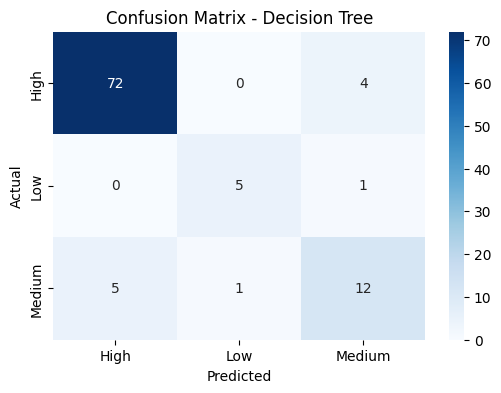

In [9]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Prediksi data uji
y_pred_dt = dt_model.predict(X_test)

# Akurasi
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy (Decision Tree): {accuracy_dt:.2f}")

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred_dt, target_names=le.classes_))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_dt)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()


#### Logistic Regresion

In [10]:
from sklearn.linear_model import LogisticRegression

# Buat dan latih model Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

Accuracy (Logistic Regression): 0.96
Classification Report:
               precision    recall  f1-score   support

        High       0.99      0.99      0.99        76
         Low       1.00      0.67      0.80         6
      Medium       0.85      0.94      0.89        18

    accuracy                           0.96       100
   macro avg       0.95      0.87      0.89       100
weighted avg       0.96      0.96      0.96       100



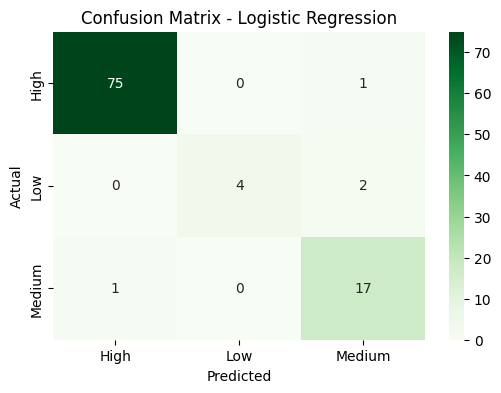

In [11]:
# Prediksi data uji
y_pred_lr = lr_model.predict(X_test)

# Akurasi
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy (Logistic Regression): {accuracy_lr:.2f}")

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred_lr, target_names=le.classes_))

# Confusion Matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Greens',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


#### Suport Vektor Machine

In [12]:
from sklearn.svm import SVC

# Buat dan latih model SVM
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)


SVC(random_state=42)

Accuracy (SVM): 0.91
Classification Report:
               precision    recall  f1-score   support

        High       0.95      0.99      0.97        76
         Low       1.00      0.33      0.50         6
      Medium       0.74      0.78      0.76        18

    accuracy                           0.91       100
   macro avg       0.90      0.70      0.74       100
weighted avg       0.91      0.91      0.90       100



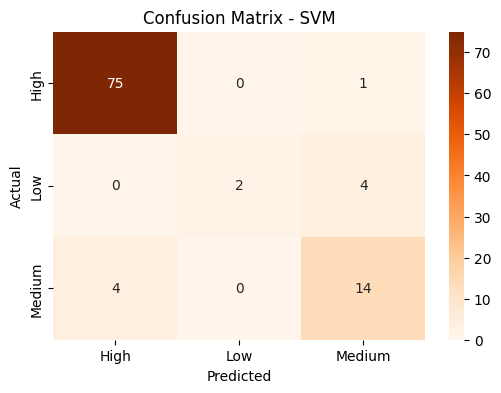

In [13]:
# Prediksi data uji
y_pred_svm = svm_model.predict(X_test)

# Akurasi
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy (SVM): {accuracy_svm:.2f}")

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred_svm, target_names=le.classes_))

# Confusion Matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM')
plt.show()


#### K-Nearest Neighbors

In [14]:
from sklearn.neighbors import KNeighborsClassifier

# Buat dan latih model KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)


KNeighborsClassifier()

Accuracy (KNN): 0.85
Classification Report:
               precision    recall  f1-score   support

        High       0.91      0.99      0.95        76
         Low       0.40      0.33      0.36         6
      Medium       0.62      0.44      0.52        18

    accuracy                           0.85       100
   macro avg       0.64      0.59      0.61       100
weighted avg       0.83      0.85      0.84       100



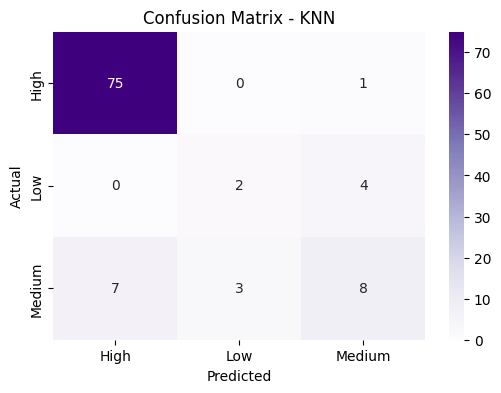

In [15]:
# Prediksi data uji
y_pred_knn = knn_model.predict(X_test)

# Akurasi
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy (KNN): {accuracy_knn:.2f}")

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred_knn, target_names=le.classes_))

# Confusion Matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Purples',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN')
plt.show()


#### Evaluasi Model (Ringkasan dan Perbandingan Model)

In [16]:
# Simpan skor akurasi tiap model
model_scores = {
    "Decision Tree": accuracy_dt,
    "Logistic Regression": accuracy_lr,
    "SVM": accuracy_svm,
    "KNN": accuracy_knn
}

# Tampilkan skor
for model, score in model_scores.items():
    print(f"{model}: {score:.2f}")


Decision Tree: 0.89
Logistic Regression: 0.96
SVM: 0.91
KNN: 0.85


<ipython-input-17-046a8ed4dcc4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(model_scores.keys()), y=list(model_scores.values()), palette="Set2")


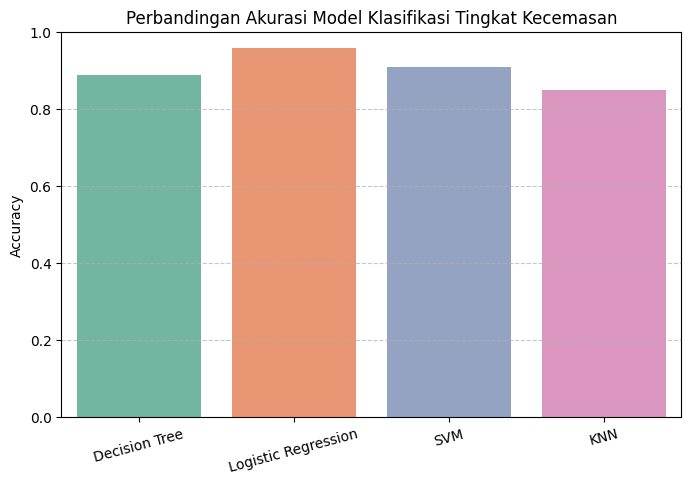

In [17]:
plt.figure(figsize=(8,5))
sns.barplot(x=list(model_scores.keys()), y=list(model_scores.values()), palette="Set2")
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title("Perbandingan Akurasi Model Klasifikasi Tingkat Kecemasan")
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#### Cross Validation Model

Cross-validation (CV) adalah metode untuk mengevaluasi performa model secara lebih andal dan stabil, dengan cara membagi data menjadi beberapa bagian (folds) dan melatih model pada kombinasi bagian tersebut secara bergantian.

In [20]:
from sklearn.model_selection import cross_val_score

# Decision Tree
cv_dt = cross_val_score(DecisionTreeClassifier(random_state=42), X, y, cv=5)
print(f"Decision Tree CV Accuracy: {cv_dt.mean():.2f} ± {cv_dt.std():.2f}")

# Logistic Regression
cv_lr = cross_val_score(LogisticRegression(max_iter=1000, random_state=42), X, y, cv=5)
print(f"Logistic Regression CV Accuracy: {cv_lr.mean():.2f} ± {cv_lr.std():.2f}")

# SVM
cv_svm = cross_val_score(SVC(kernel='rbf', random_state=42), X, y, cv=5)
print(f"SVM CV Accuracy: {cv_svm.mean():.2f} ± {cv_svm.std():.2f}")

# KNN
cv_knn = cross_val_score(KNeighborsClassifier(n_neighbors=5), X, y, cv=5)
print(f"KNN CV Accuracy: {cv_knn.mean():.2f} ± {cv_knn.std():.2f}")


Decision Tree CV Accuracy: 0.88 ± 0.02


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression CV Accuracy: 0.97 ± 0.02
SVM CV Accuracy: 0.76 ± 0.00
KNN CV Accuracy: 0.76 ± 0.02


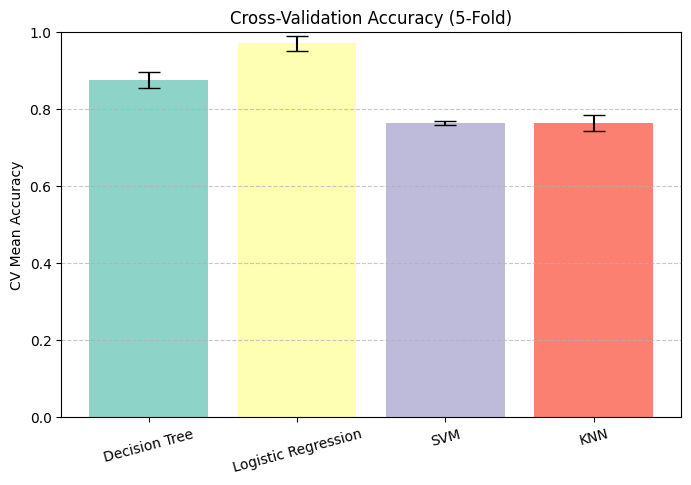

In [23]:
# Simpan hasil cross-validation ke dalam dictionary
cv_means = {
    "Decision Tree": cv_dt.mean(),
    "Logistic Regression": cv_lr.mean(),
    "SVM": cv_svm.mean(),
    "KNN": cv_knn.mean()
}

cv_stds = {
    "Decision Tree": cv_dt.std(),
    "Logistic Regression": cv_lr.std(),
    "SVM": cv_svm.std(),
    "KNN": cv_knn.std()
}

# Siapkan data
models = list(cv_means.keys())
means = np.array(list(cv_means.values()))
stds = np.array(list(cv_stds.values()))

# Buat bar plot
plt.figure(figsize=(8,5))
bars = plt.bar(models, means, yerr=stds, capsize=8, color=sns.color_palette("Set3"))

# Atur label dan gaya
plt.ylim(0, 1)
plt.ylabel("CV Mean Accuracy")
plt.title("Cross-Validation Accuracy (5-Fold)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=15)
plt.show()


## Kesimpulan

Dalam proyek ini, telah dilakukan klasifikasi tingkat kecemasan (*anxiety level*) menjadi tiga kelas utama: **rendah**, **sedang**, dan **tinggi**, berdasarkan atribut perilaku digital dan kesehatan mental responden. Proses analisis dan klasifikasi dilakukan menggunakan empat algoritma machine learning, yaitu:

1. **Decision Tree**
2. **Logistic Regression**
3. **Support Vector Machine (SVM)**
4. **K-Nearest Neighbors (KNN)**

Setelah dilakukan pelatihan dan pengujian model, serta validasi menggunakan metode **5-Fold Cross-Validation**, diperoleh hasil sebagai berikut:

| Model               | Akurasi | Akurasi Rata-rata (CV) | Stabilitas (STD CV) |
|---------------------|---------|--------------------------|----------------------|
| Decision Tree       | 0.89%     | 0.88%                      | ± 0.02%                |
| Logistic Regression | 0.96%     | 0.97%                      | ± 0.02%                |
| SVM                 | 0.91%     | 0.76%                      | ± 0.00%                |
| KNN                 | 0.85%     | 0.76%                      | ± 0.02%                |

### Temuan Penting:

- **Model dengan akurasi tertinggi** adalah: **Logistic Regression**, yang menunjukkan performa paling konsisten dalam mengklasifikasikan tingkat kecemasan responden.
- **Decision Tree** menawarkan interpretasi yang jelas terhadap struktur keputusan, namun berisiko mengalami overfitting.
- **Logistic Regression** bekerja baik untuk hubungan linear dan sederhana antar variabel.
- **SVM** efektif dalam memisahkan kelas secara non-linear, cocok untuk data dengan batas yang tidak jelas.
- **KNN** mudah diimplementasikan namun sensitif terhadap pemilihan nilai `k` dan skala fitur.

### Simpulan Akhir:

Penerapan machine learning dalam klasifikasi tingkat kecemasan terbukti efektif dan menjanjikan. Dengan pendekatan ini, sangat memungkinkan untuk mengembangkan sistem pemantauan dan deteksi risiko gangguan mental berbasis data, yang dapat membantu penyedia layanan kesehatan mental untuk memberikan intervensi secara lebih dini dan tepat sasaran.